## Practical Bioinformatics. Homework 5 (Calculation of IQ of a bacterium).


In his article in 2005, Mikhail Galperin has proposed the concept of bacterial IQ. The more genes a bacterium has (which encode dif. signaling proteins), the larger the repertoire of its possible reactions to external influences (and the smarter it is). 

It was proposed to consider the following types of signaling proteins as the main ones:


---
**Type of enzymes** | **Domain 1** | **Domain 2**

Histidine kinases | phosphoacceptor domain:
HisKA [Pfam:PF00512]
HisKA_2 [Pfam:PF07568]
HisKA_3 [Pfam:PF07730]
HWE_HK [Pfam:PF07536] | ATPase domain: 
HATPase_c [Pfam:PF02518]

Methyl-accepting chemotaxis proteins | Methyl-accepting protein (MCP) domain: [Pfam:PF00015] | -

Ser/Thr/Tyr kinases | Ser/Thr/Tyr kinase (STYK) domain: 
[Pfam:PF00069] | -

Diguanylate cyclases | GGDEF domains:
[Pfam:PF00990] | -

Adenylate cyclases | AC1 domains:
[Pfam:PF01295],
AC2 domains:
[Pfam:PF01928],
or AC3 domains:
[Pfam:PF00211] | -

Predicted c-di-GMP phosphodiesterases | EAL domains:
[Pfam:PF00563],
HD-GYP domain:
[Pfam:PF01966] | -


---

In order for an enzyme to be recognized as a histidine kinase, it must contain an ATPase domain and one of the variants of the phosphoacceptor domain. It is enough for the other types of enzymes to contain one domain of any kind from the corresponding cell.





The IQ of a bacterium is defined as the proportion of these proteins among all the proteins encoded in the genome. We will need to calculate the IQ of any bacteria of our choice.

Let's choose *Actibacterium atlanticum*.

Actibacterium atlanticum is a Gram-negative and non-motile bacterium from the genus of Actibacterium which has been isolated from seawater from the Atlantic Ocean.

**1.1. Download the sequences of all the proteins of chosen bacteria.**

We need to find the organism in the catalog ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/; go through the folders latest_assembly_versions; then choose any and download the file *_protein.faa.gz.

*GCF_000671395.1_SOAPdenovo_v1.05_protein.faa.gz via the link https://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/Actibacterium_atlanticum/latest_assembly_versions/GCF_000671395.1_SOAPdenovo_v1.05/



**1.2 Download alignments for all the 13 domains (located in the input table).**

For each domain let's do the next steps:

1. At the pfam website (http://pfam.xfam.org/) enter the ID of a domain and go to the alignments tab (on the left side).
2. Choose fasta format and generate it.



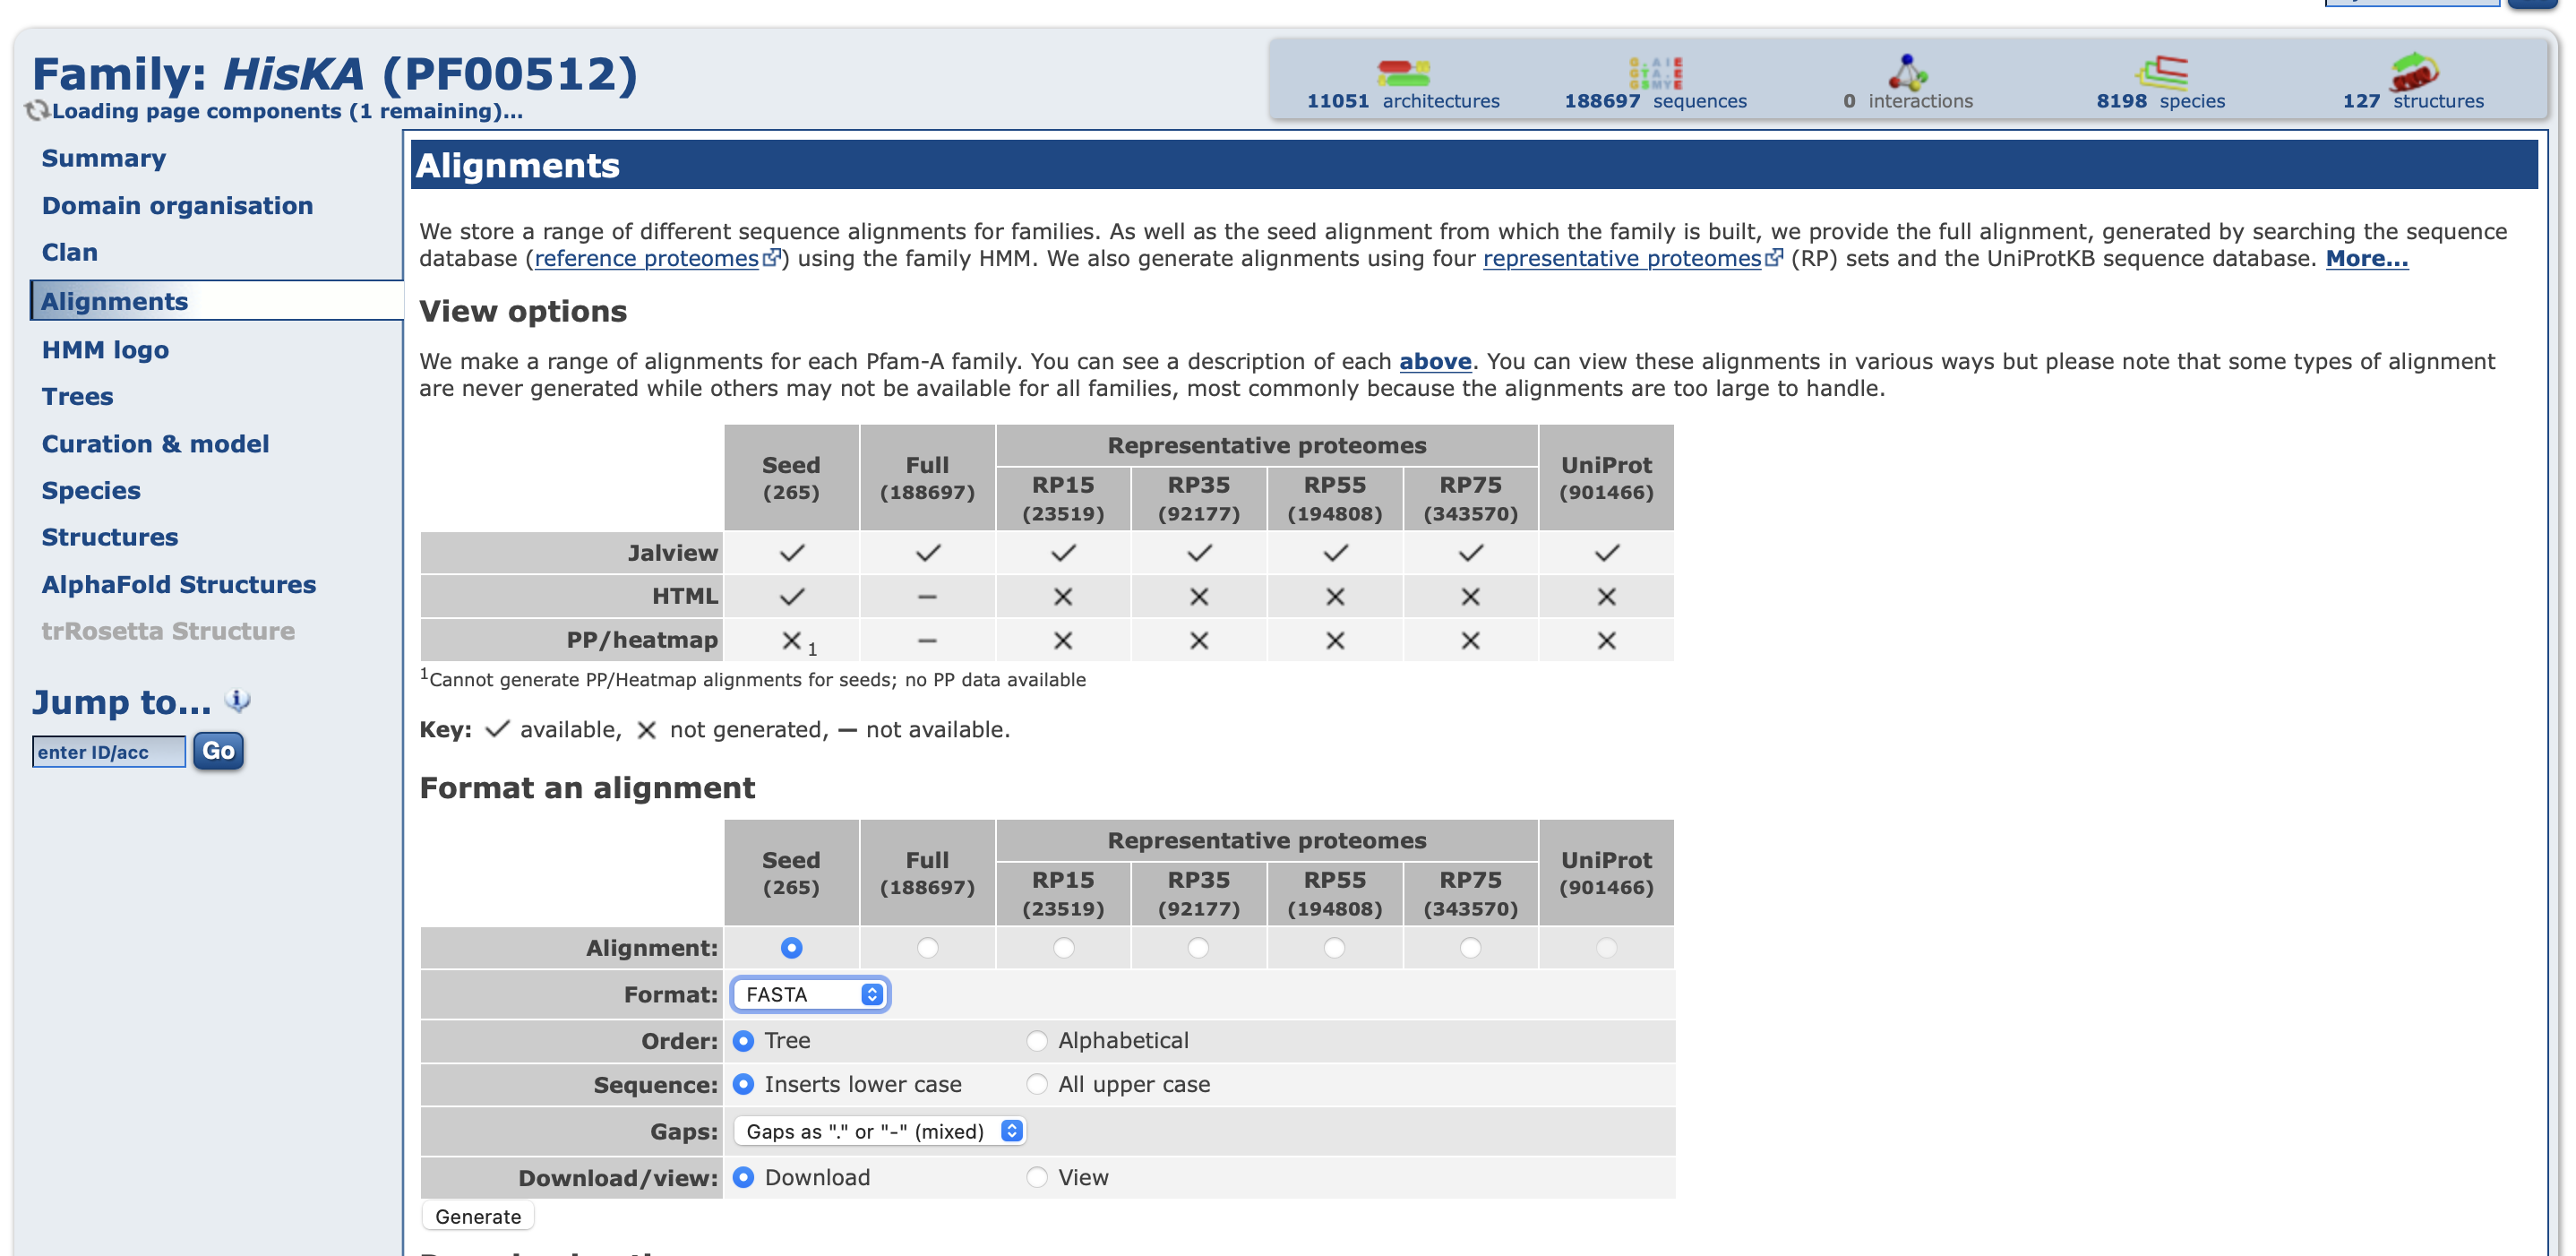

**1.3 Install HMMER.**

To search for domains in the proteins of a bacterium, we need to build a hidden Markov model (HMM) for each domain by alignment, then to scan all the proteins of a bacterium with it. HMMER can do that.

In [ ]:
# to download the program, let's do this:
%%bash
wget http://eddylab.org/software/hmmer/hmmer-3.3.2.tar.gz -q
tar xf hmmer-3.3.2.tar.gz
cd hmmer-3.3.2
./configure
make
make install

configure: Configuring HMMER3 for your system.
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking whether to compile using MPI... no
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for gcc option to accept ISO C99... none needed
checking for gcc option to accept ISO Standard C... (cached) none needed
checking how to run the C preprocessor... gcc -E
checking for a BSD-compatible install... /usr/bin/install -c
checking for strip... strip
checking for ranlib... ranlib
checking for ar... /usr/bin/ar
checking whether ln -s works... yes
checking for a sed that does not truncat

After that, we get hmmer-3.3 folder, which contains src folder w/ the program files needed to run inside of it.

**1.4 Create a script that launches hmmer for all the considered alignments.**


Let's put the alignments in the folder near to the hmmer-3.3.2 folder. Then, create another folder for profiles (as expected result).

In [ ]:
!mkdir alignments # put the input data in this folder

In [ ]:
!mkdir profiles

To build the profile for one alignment, it is needed to run the command:

In [ ]:
domains_num = ['00015','00069','00211','00512','00563','00990','01295','01928','01966','02518','07536','07568','07730']

for domain_num in domains_num:
  !./hmmer-3.3.2/src/hmmbuild ./profiles/actibacterium_atlanticum_PF{domain_num}.hmm ./alignments/PF{domain_num}_seed.fasta
# it generates .hmm files (profiles).

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             ./alignments/PF00015_seed.fasta
# output HMM file:                  ./profiles/actibacterium_atlanticum_PF00015.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     PF00015_seed             9   192   172     1.11  0.591 

# CPU time: 0.14u 0.00s 00:00:00.14 Elapsed: 00:00:00.15
# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD 

So, we want to "learn" domains and find them in a bacterium.

For this, we take the domains from Pfam; therefore, the profile is formed according to the seqs from Pfam.

The Pfam database is a large collection of protein families (each represented by multiple sequence alignments and hidden Markov models (HMMs)).

To search these profiles in the input sequence, we need to run the command then:

In [ ]:
for domain_num in domains_num:
  !./hmmer-3.3.2/src/hmmsearch ./profiles/actibacterium_atlanticum_PF{domain_num}.hmm ./GCF_000671395.1_SOAPdenovo_v1.05_protein.faa > results_atlanticum_PF{domain_num}.txt

**1.5. Analyze results and count the num of signaling proteins.**

For each domain, it is needed to count the num of detected hits.

P.S. The good finding for Histidine kinase (HK) is considered such one that contains both types domains: ATPase domain and one of the variants of the phosphoacceptor domain.

For all the other types of enzymes, it is sufficient for a protein to contain any of its corresponding domains. If a protein contains two alternative species domains at once, it does not need to be counted twice.


In [ ]:
for domain_num in domains_num:
  with open(f'results_atlanticum_PF{domain_num}.txt') as f:
    if '[No hits detected that satisfy reporting thresholds]' in f.read():
        print(f'PF{domain_num} has 0 detected hits (findings)')
    else:
      print(f'PF{domain_num} has several findings')

PF00015 has 0 detected hits (findings)
PF00069 has 0 detected hits (findings)
PF00211 has 0 detected hits (findings)
PF00512 has several findings
PF00563 has several findings
PF00990 has several findings
PF01295 has 0 detected hits (findings)
PF01928 has several findings
PF01966 has several findings
PF02518 has several findings
PF07536 has several findings
PF07568 has 0 detected hits (findings)
PF07730 has several findings


Let's count findings for each domain at first:

In [ ]:
for domain_num in domains_num:
  with open(f'results_atlanticum_PF{domain_num}.txt') as f:
    targets_one = [line for line in f if ('Domain search space  (domZ):') in line] # our findings
    print(f'PF{domain_num} has {targets_one}')

PF00015 has ['Domain search space  (domZ):               0  [number of targets reported over threshold]\n']
PF00069 has ['Domain search space  (domZ):               0  [number of targets reported over threshold]\n']
PF00211 has ['Domain search space  (domZ):               0  [number of targets reported over threshold]\n']
PF00512 has ['Domain search space  (domZ):              30  [number of targets reported over threshold]\n']
PF00563 has ['Domain search space  (domZ):               2  [number of targets reported over threshold]\n']
PF00990 has ['Domain search space  (domZ):               5  [number of targets reported over threshold]\n']
PF01295 has ['Domain search space  (domZ):               0  [number of targets reported over threshold]\n']
PF01928 has ['Domain search space  (domZ):               1  [number of targets reported over threshold]\n']
PF01966 has ['Domain search space  (domZ):               4  [number of targets reported over threshold]\n']
PF02518 has ['Domain search 

Then, we need to find intersections between phosphoacceptor domain: 

HisKA [Pfam:PF00512]/HisKA_2 [Pfam:PF07568]/HisKA_3 [Pfam:PF07730]/HWE_HK [Pfam:PF07536] 

and ATPase domain: 

HATPase_c [Pfam:PF02518]

1. PF00512 and PF02518 have 19 intersections (findings);

2. PF07568 and PF02518 have 0 findings;

3. PF07730 and PF02518 have 0 findings.

4. PF07536 and PF0251 have 1 finding.


*Findings:*

PF00015 - 0

PF00069 - 0

PF00211 - 0

PF00512/PF02518 - **19**

PF00563 - **2** 

PF00990 - **5** 

PF01295 - 0

PF01928 - **1**

PF01966 - **4** 

PF07536/PF02518 - **1**

PF07568/PF02518 - 0

PF07730/PF02518 - 0

In [2]:
findings = 19+2+5+1+4+1 # good ones
findings

32

Then, let's find the number of all the found proteins (it is the same among all the domains, we may prove it by running the following commands):

In [ ]:
for domain_num in domains_num:
  with open(f'results_atlanticum_PF{domain_num}.txt') as f:
    targets_two = [line for line in f if ('Initial search space (Z):') in line]
    print(f'PF{domain_num} has {targets_two}')

PF00015 has ['Initial search space (Z):               3115  [actual number of targets]\n']
PF00069 has ['Initial search space (Z):               3115  [actual number of targets]\n']
PF00211 has ['Initial search space (Z):               3115  [actual number of targets]\n']
PF00512 has ['Initial search space (Z):               3115  [actual number of targets]\n']
PF00563 has ['Initial search space (Z):               3115  [actual number of targets]\n']
PF00990 has ['Initial search space (Z):               3115  [actual number of targets]\n']
PF01295 has ['Initial search space (Z):               3115  [actual number of targets]\n']
PF01928 has ['Initial search space (Z):               3115  [actual number of targets]\n']
PF01966 has ['Initial search space (Z):               3115  [actual number of targets]\n']
PF02518 has ['Initial search space (Z):               3115  [actual number of targets]\n']
PF07536 has ['Initial search space (Z):               3115  [actual number of targets]\n']

In [ ]:
proteins = 3115 # num of proteins

**1.6. Calculate bacterial IQ**

For this, we need to divide the num of signaling proteins into the overall number of proteins:


In [ ]:
findings/proteins

0.010272873194221509

Additionaly, we may use Mikhail Galperin formula retrieved from the article https://bmcmicrobiol.biomedcentral.com/articles/10.1186/1471-2180-5-35


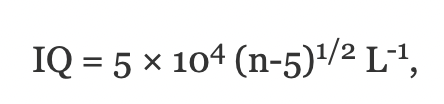

where n - num of findings, L - size of a genome in kb (for actibacterium atlanticum may be found here https://www.ncbi.nlm.nih.gov/genome/?term=Actibacterium+atlanticum)

In [4]:
genome_size = 3176.38
IQ = 5*10**4*(findings-5)**(1/2)*genome_size**(-1)

In [5]:
IQ

81.79362076808555

If we compare it w/ other bacteria we conclude that actibacterium atlanticum has the average IQ -

https://www.ncbi.nlm.nih.gov/Complete_Genomes/SignalCensus.html.